#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data collection & Preprocessing

In [2]:
 dataset_=pd.read_csv(r'C:\Users\admin\Downloads\new_retail_data.csv\new_retail_data.csv')


#### Check data structure

In [3]:
 dataset_.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [156]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [4]:
df=dataset_[['Transaction_ID','Customer_ID','Date', 'Year', 'Month', 'Time','Customer_Segment','Total_Purchases','Amount', 'Total_Amount','Product_Category', 'Product_Brand','Product_Type','Shipping_Method', 'Payment_Method',
       'Order_Status','Age','Income','Ratings','Feedback','products']]

In [5]:
df.head()

,Transaction_ID,Customer_ID,Date,Year,Month,Time,Customer_Segment,Total_Purchases,Amount,Total_Amount,...,Product_Brand,Product_Type,Shipping_Method,Payment_Method,Order_Status,Age,Income,Ratings,Feedback,products
0,8691788.0,37249.0,9/18/2023,2023.0,September,22:03:55,Regular,3.0,108.028757,324.086270,...,Nike,Shorts,Same-Day,Debit Card,Shipped,21.0,Low,5.0,Excellent,Cycling shorts
1,2174773.0,69749.0,12/31/2023,2023.0,December,8:42:04,Premium,2.0,403.353907,806.707815,...,Samsung,Tablet,Standard,Credit Card,Processing,19.0,Low,4.0,Excellent,Lenovo Tab
2,6679610.0,30192.0,4/26/2023,2023.0,April,4:06:29,Regular,3.0,354.477600,1063.432799,...,Penguin Books,Children's,Same-Day,Credit Card,Processing,48.0,Low,2.0,Average,Sports equipment
3,7232460.0,62101.0,5/8/2023,2023.0,May,14:55:17,Premium,7.0,352.407717,2466.854021,...,Home Depot,Tools,Standard,PayPal,Processing,56.0,High,4.0,Excellent,Utility knife
4,4983775.0,27901.0,1/10/2024,2024.0,January,16:54:07,Premium,2.0,124.276524,248.553049,...,Nestle,Chocolate,Standard,Cash,Shipped,22.0,Low,1.0,Bad,Chocolate cookies


#### Check null values

In [6]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Date                359
Year                350
Month               273
Time                350
Customer_Segment    215
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Shipping_Method     337
Payment_Method      297
Order_Status        235
Age                 173
Income              290
Ratings             184
Feedback            184
products              0
dtype: int64

#### Fill numerical missing values with median

In [7]:
df.fillna({'Total_Purchases':df['Total_Purchases'].median(),'Amount':df['Amount'].median(),'Total_Amount':df['Total_Amount'].median()},inplace=True)

In [8]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Date                359
Year                350
Month               273
Time                350
Customer_Segment    215
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category    283
Product_Brand       281
Product_Type          0
Shipping_Method     337
Payment_Method      297
Order_Status        235
Age                 173
Income              290
Ratings             184
Feedback            184
products              0
dtype: int64

#### Fill categorical missing values with mode

In [9]:
for col in ['Customer_Segment','Product_Category','Product_Brand','Product_Type','Shipping_Method','Payment_Method','Order_Status']:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Date                359
Year                350
Month               273
Time                350
Customer_Segment      0
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Age                 173
Income              290
Ratings             184
Feedback            184
products              0
dtype: int64

#### Convert Year and Month to Intigers

In [11]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')


In [12]:
df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S',errors='coerce').dt.time

In [13]:
df=df.dropna(subset=["Date","Year","Month","Time"])

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Date                0
Year                0
Month               0
Time                0
Customer_Segment    0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Age                 0
Income              0
Ratings             0
Feedback            0
products            0
dtype: int64

#### Check duplicated values

In [16]:
df.duplicated().sum()

4

#### Remove duplicates       

In [18]:
df=df[df.duplicated(keep=False)==False]

In [19]:
df.duplicated().sum()


0

In [20]:
df.to_csv("reatail_data.csv",index=False)
import os 
os.getcwd()

'C:\\Users\\admin\\Downloads'

#### Outlier Detection

In [21]:
df.describe()

,Transaction_ID,Customer_ID,Date,Year,Total_Purchases,Amount,Total_Amount,Age,Ratings
count,2.993880e+05,299388.000000,299388,299388.000000,299388.000000,299388.000000,299388.000000,299388.000000,299388.000000
mean,5.495156e+06,55011.782663,2023-08-30 15:55:32.478255616,2023.165063,5.359410,255.202493,1367.418739,35.484044,3.162628
min,1.000007e+06,10000.000000,2023-03-01 00:00:00,2023.000000,1.000000,10.000219,10.003750,18.000000,1.000000
25%,3.247262e+06,32470.000000,2023-05-31 00:00:00,2023.000000,3.000000,133.036537,439.406108,22.000000,2.000000
50%,5.498506e+06,55020.000000,2023-08-31 00:00:00,2023.000000,5.000000,255.470969,1041.117547,32.000000,3.000000
75%,7.739058e+06,77516.000000,2023-11-30 00:00:00,2023.000000,8.000000,377.574048,2027.780592,46.000000,4.000000
max,9.999995e+06,99999.000000,2024-02-29 00:00:00,2024.000000,10.000000,499.997911,4999.625796,70.000000,5.000000
std,2.595801e+06,26007.067332,NaN,0.371238,2.866563,141.324491,1128.398248,15.022588,1.320694


In [22]:
df['Date']=pd.to_datetime(df['Date'])

In [23]:
df_daily=df.groupby('Date')['Total_Amount'].sum().reset_index()

In [24]:
df_daily.set_index('Date',inplace=True)

In [25]:
df_daily.head()

,Total_Amount
Date,
2023-03-01,1.103786e+06
2023-03-02,1.116609e+06
2023-03-03,1.092262e+06
2023-03-04,1.072029e+06
2023-03-05,1.149945e+06


#### Outlier Detection

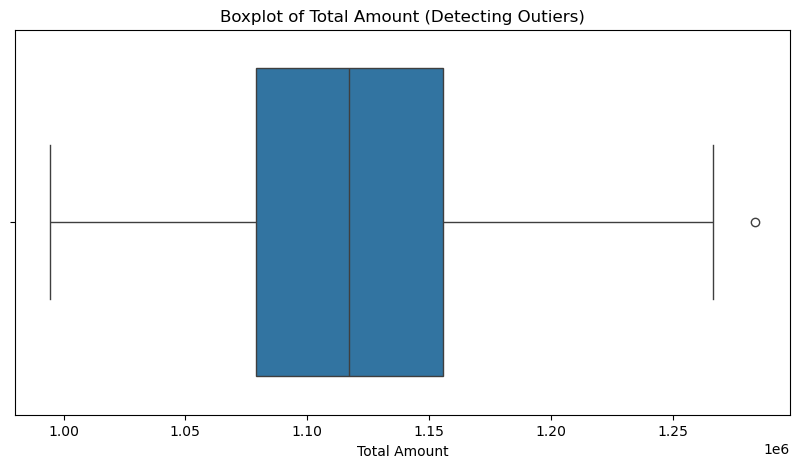

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_daily['Total_Amount'])
plt.xlabel('Total Amount')
plt.title('Boxplot of Total Amount (Detecting Outiers)')
plt.show()

### Exploratory Data Anaysis(EDA) 

#### Find Top Selling Products

In [27]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Date', 'Year', 'Month', 'Time',
       'Customer_Segment', 'Total_Purchases', 'Amount', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Age', 'Income', 'Ratings',
       'Feedback', 'products'],
      dtype='object')

In [28]:
top_products=df.groupby('products')['Total_Amount'].sum().reset_index()
top_products=top_products.sort_values(by='Total_Amount',ascending=False)
print(top_products.head(10))

            products  Total_Amount
39     Bottled water  3.390184e+06
270     Spring water  3.377548e+06
98   Distilled water  3.366308e+06
266  Sparkling water  3.359570e+06
181    Mineral water  3.349824e+06
118   Flavored water  3.345156e+06
8     Alkaline water  3.343517e+06
15    Artesian water  3.298986e+06
190          Mystery  3.284411e+06
5          Adventure  3.238766e+06


#### Find Top Selling Categories

In [29]:
top_categories=df.groupby('Product_Category')['Total_Amount'].sum().reset_index()
top_categories=top_categories.sort_values(by='Total_Amount',ascending=False)
print(top_categories.head(10))

  Product_Category  Total_Amount
2      Electronics  9.701992e+07
3          Grocery  9.041133e+07
1         Clothing  7.424769e+07
0            Books  7.399536e+07
4       Home Decor  7.371447e+07


#### Visualize the Top 10 Products & Categories

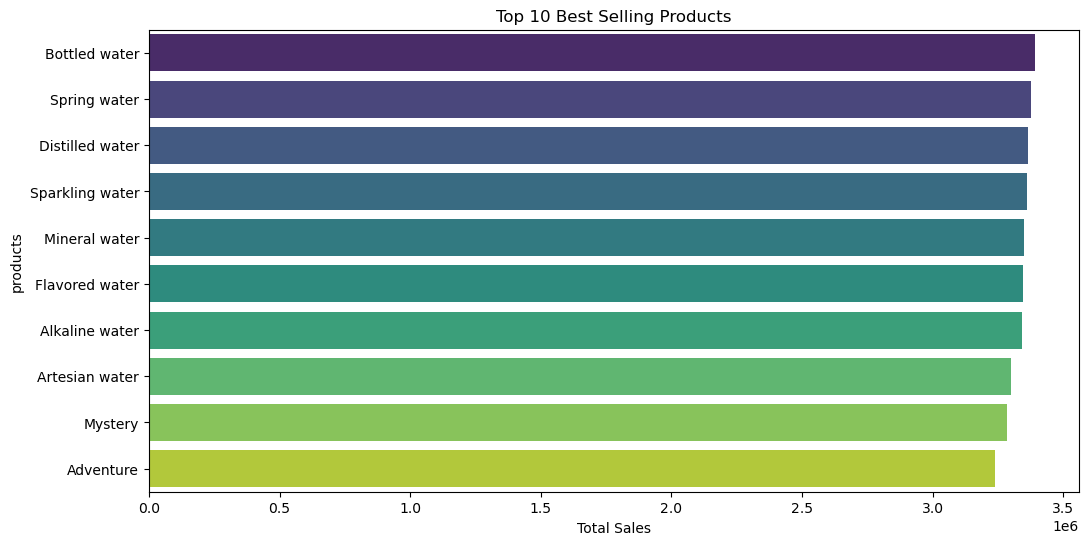

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.head(10)['Total_Amount'],y=top_products.head(10)['products'],palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('products')
plt.title('Top 10 Best Selling Products')
plt.show()

#### Top 10 Categories

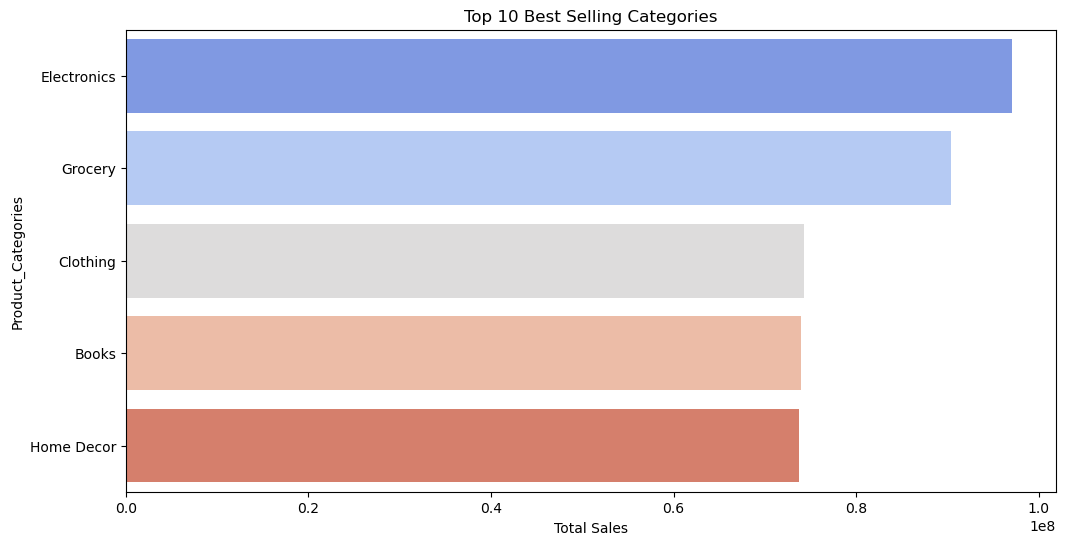

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.head(10)['Total_Amount'],y=top_categories.head(10)['Product_Category'],palette='coolwarm')
plt.xlabel('Total Sales')
plt.ylabel('Product_Categories')
plt.title('Top 10 Best Selling Categories')
plt.show()

#### Costumer Demographics & Buying Patterns

In [32]:
customer_sales=df.groupby('Customer_Segment')['Total_Amount'].sum().reset_index()
customer_sales=customer_sales.sort_values(by='Total_Amount',ascending=False)

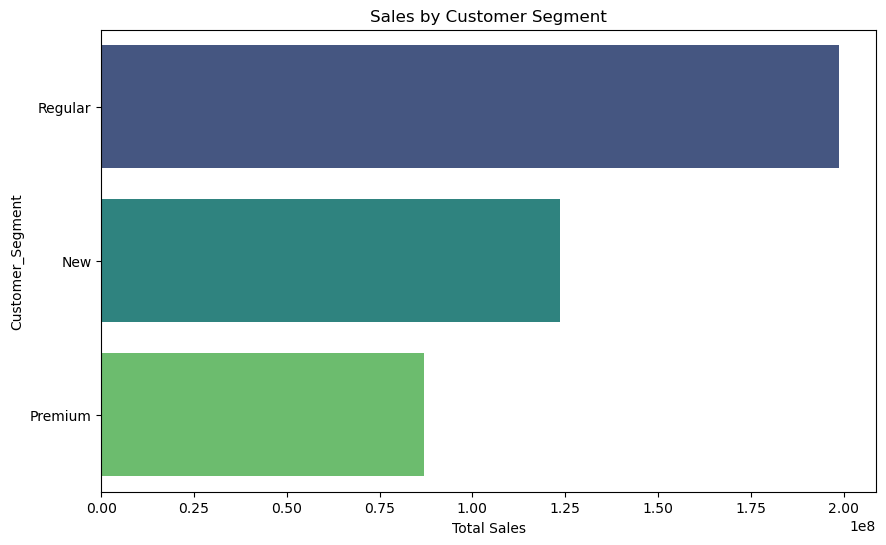

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Amount',y='Customer_Segment',data=customer_sales,palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Customer_Segment')
plt.title('Sales by Customer Segment')
plt.show()

#### Sales Trends

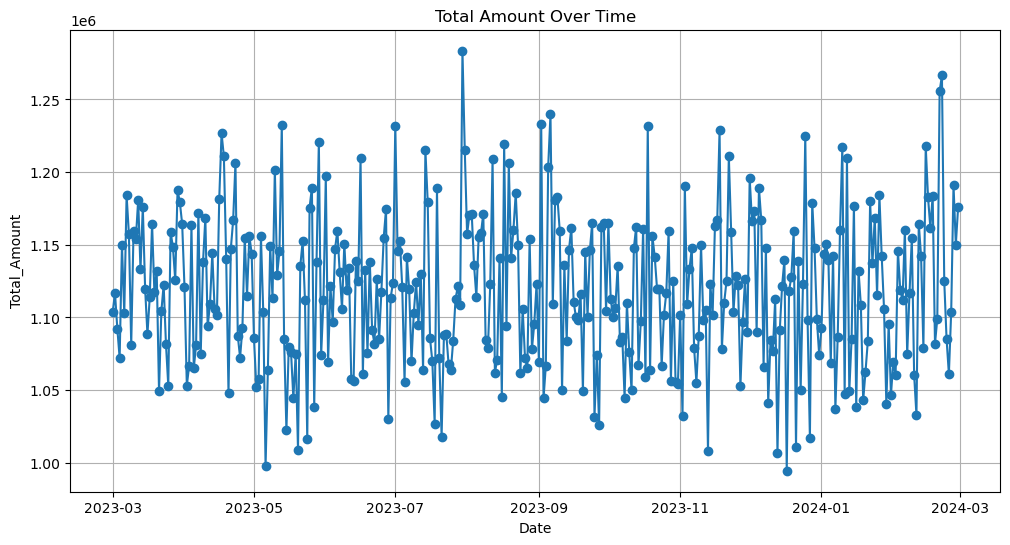

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df_daily.index,df_daily['Total_Amount'],marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total_Amount')
plt.title('Total Amount Over Time')
plt.grid()
plt.show()

#### Customer Demographics & Buying Patterns

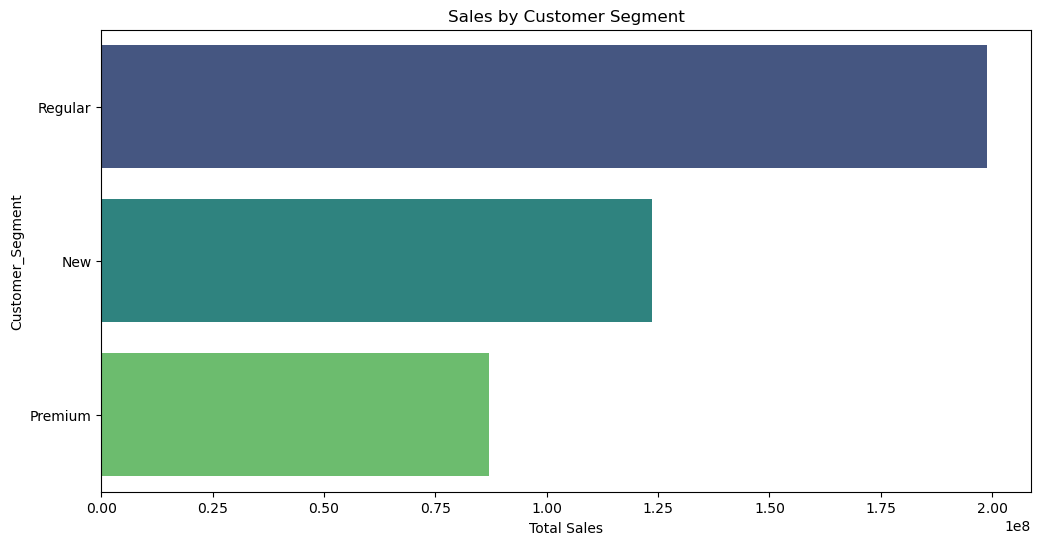

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='Total_Amount',y='Customer_Segment',data=customer_sales,palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Customer_Segment')
plt.title('Sales by Customer Segment')
plt.show()

#### Product Return Rate

#### The dataset dose not contain explict information about product returns.specificay:Ther is not Return Status or Returned Quantity coumn.

#### Customer Segmentation

#### RFM Analysis

In [36]:
reference_rate=df['Date'].max()
rfm=df.groupby('Customer_ID').agg({'Date':lambda x:(reference_rate-x.max()).days,'Transaction_ID':'nunique','Total_Amount':'sum'}).reset_index()
rfm.columns=['Customer_ID','Recency','Frequency','Monitory']
print(rfm.head())

   Customer_ID  Recency  Frequency     Monitory
0      10000.0      102          4  5007.566357
1      10001.0      104          5  8136.462824
2      10002.0       94          5  4104.013951
3      10003.0      227          2  2340.496447
4      10004.0       30          2  2356.516683


#### RFM Score

In [37]:
rfm['R_Score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['F_Score']=pd.qcut(rfm['Frequency'],5,labels=[1,2,3,4,5])
rfm['M_Score']=pd.qcut(rfm['Monitory'],5,labels=[1,2,3,4,5])

#### Combine RFM Score

In [38]:
rfm['RFM_Score']=rfm['R_Score'].astype(str)+rfm['F_Score'].astype(str)+rfm['M_Score'].astype(str)
print(rfm[['Customer_ID','Recency','Frequency','Monitory','RFM_Score']].head())

   Customer_ID  Recency  Frequency     Monitory RFM_Score
0      10000.0      102          4  5007.566357       233
1      10001.0      104          5  8136.462824       245
2      10002.0       94          5  4104.013951       343
3      10003.0      227          2  2340.496447       112
4      10004.0       30          2  2356.516683       412


In [39]:
def classify_rfm(score):
    if score in ['555','554','545','544']:
        return 'Best Customers'
    elif score in ['455','454','445','444']:
        return 'Loyal Customers'
    elif score in ['355','354','344','343']:
        return 'Potential loyalists'
    elif score in ['255','254','244','243']:
        return 'Recent Customers'
    elif score in ['155','154','144','143']: 
        return 'At Risk Customers'
    elif score in ['115','114','113','112']:  
       return 'Lost Customers' 
    else:
        return 'Others'
        

In [40]:
rfm['Customer_Segment']=rfm['RFM_Score'].apply(classify_rfm)
print(rfm[['Customer_ID','RFM_Score','Customer_Segment']].head())

   Customer_ID RFM_Score     Customer_Segment
0      10000.0       233               Others
1      10001.0       245               Others
2      10002.0       343  Potential loyalists
3      10003.0       112       Lost Customers
4      10004.0       412               Others


In [41]:
segment_counts=rfm['Customer_Segment'].value_counts()
print(segment_counts)

Customer_Segment
Others                 64737
Best Customers          5950
Lost Customers          5328
Loyal Customers         4919
Potential loyalists     3246
Recent Customers        2004
At Risk Customers        499
Name: count, dtype: int64


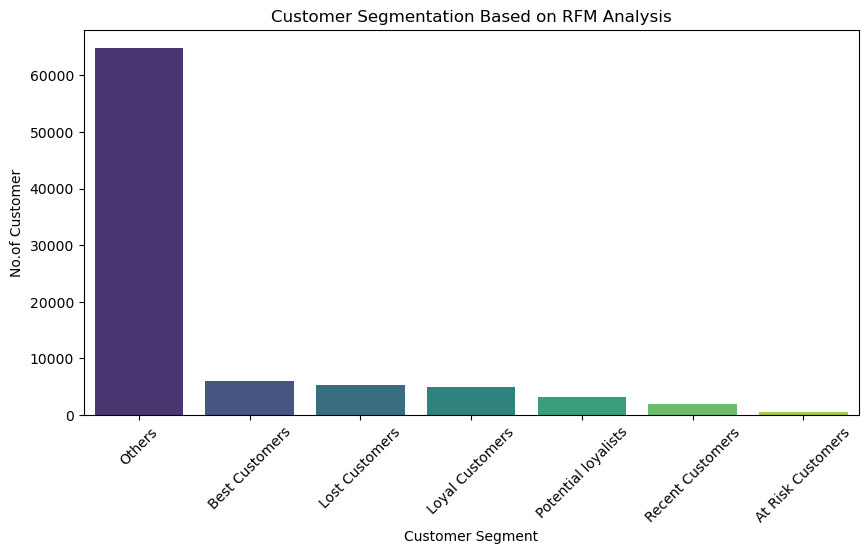

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x=segment_counts.index,y=segment_counts.values,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Customer Segment')
plt.ylabel('No.of Customer')
plt.title('Customer Segmentation Based on RFM Analysis')
plt.show()

### Market Basket Analysis

In [43]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

### Training the Apriori model on the dataset

In [44]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)
rules

<generator object apriori at 0x000001BBA5FC81A0>

### Visualising the results

In [45]:
results = list(rules)
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

In [46]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [47]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Displaying the results sorted by descending lifts

In [48]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


### Sales Forcasting

In [49]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [50]:
result=adfuller(df_daily['Total_Amount'])
print("ADF Statistical:",result[0])
print("p_values:",result[1])

ADF Statistical: -17.832676768645165
p_values: 3.128776323358479e-30


In [51]:
stepwise_fit=auto_arima(df_daily['Total_Amount'],seasonal=False,trace=True)
print("Best ARIMA Order:",stepwise_fit.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11236.428, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10976.969, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=10916.117, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=10901.134, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=10894.987, Time=0.11 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=10893.707, Time=0.15 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=9005.088, Time=0.10 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=9003.008, Time=0.09 

In [52]:
model=ARIMA(df_daily['Total_Amount'],order=(0,0,0))
model_fit=model.fit()
print(model_fit.summary)


<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x000001BBA9C9B550>>


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


#### Forecast Future Sales

In [53]:
forecast_steps=30
forecast=model_fit.forecast(steps=forecast_steps)
print(forecast)

2024-03-01    1.118549e+06
2024-03-02    1.118549e+06
2024-03-03    1.118549e+06
2024-03-04    1.118549e+06
2024-03-05    1.118549e+06
2024-03-06    1.118549e+06
2024-03-07    1.118549e+06
2024-03-08    1.118549e+06
2024-03-09    1.118549e+06
2024-03-10    1.118549e+06
2024-03-11    1.118549e+06
2024-03-12    1.118549e+06
2024-03-13    1.118549e+06
2024-03-14    1.118549e+06
2024-03-15    1.118549e+06
2024-03-16    1.118549e+06
2024-03-17    1.118549e+06
2024-03-18    1.118549e+06
2024-03-19    1.118549e+06
2024-03-20    1.118549e+06
2024-03-21    1.118549e+06
2024-03-22    1.118549e+06
2024-03-23    1.118549e+06
2024-03-24    1.118549e+06
2024-03-25    1.118549e+06
2024-03-26    1.118549e+06
2024-03-27    1.118549e+06
2024-03-28    1.118549e+06
2024-03-29    1.118549e+06
2024-03-30    1.118549e+06
Freq: D, Name: predicted_mean, dtype: float64


#### Plot the Forecast

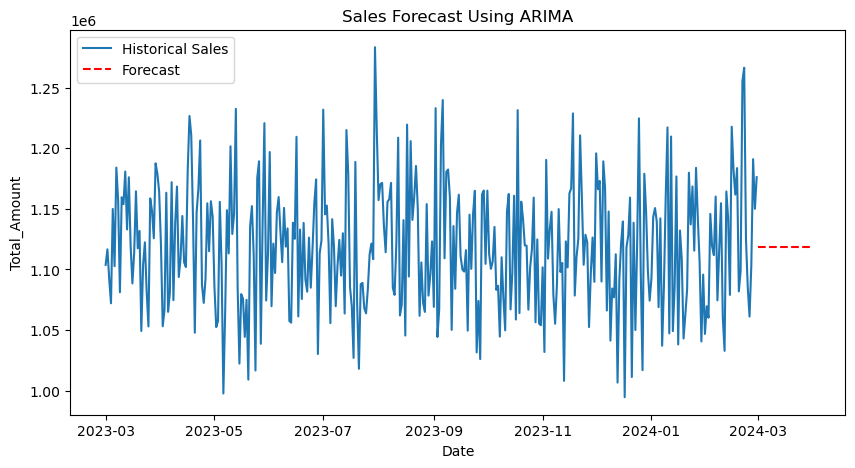

In [54]:
plt.figure(figsize=(10,5))
plt.plot(df_daily.index,df_daily['Total_Amount'],label='Historical Sales')
future_dates=pd.date_range(start=df_daily.index[-1],periods=forecast_steps+1,freq='D')[1:]
plt.plot(future_dates,forecast,label='Forecast',linestyle='dashed',color='red')
plt.xlabel('Date')
plt.ylabel('Total_Amount')
plt.title('Sales Forecast Using ARIMA')
plt.legend()
plt.show()

#### Churn Prediction

In [55]:
print(df['Feedback'].unique())

['Excellent' 'Average' 'Bad' 'Good']


In [56]:
df['Churn']=df['Feedback'].apply(lambda x:0 if x.lower()=='bad' else 1)

In [57]:
print(df[['Feedback','Churn']].head(10))

    Feedback  Churn
0  Excellent      1
1  Excellent      1
2    Average      1
3  Excellent      1
4        Bad      0
5       Good      1
6        Bad      0
7        Bad      0
8        Bad      0
9  Excellent      1


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [59]:
features=['Total_Purchases','Amount','Total_Amount','Ratings']

In [60]:
X=df[features]
y=df['Churn']
print(X)
print(y)

        Total_Purchases      Amount  Total_Amount  Ratings
0                   3.0  108.028757    324.086270      5.0
1                   2.0  403.353907    806.707815      4.0
2                   3.0  354.477600   1063.432799      2.0
3                   7.0  352.407717   2466.854021      4.0
4                   2.0  124.276524    248.553049      1.0
...                 ...         ...           ...      ...
302005              5.0  194.792597    973.962984      1.0
302006              1.0  285.137301    285.137301      5.0
302007              3.0   60.701761    182.105285      2.0
302008              1.0  120.834784    120.834784      4.0
302009              7.0  340.319059   2382.233417      2.0

[299388 rows x 4 columns]
0         1
1         1
2         1
3         1
4         0
         ..
302005    0
302006    1
302007    1
302008    1
302009    1
Name: Churn, Length: 299388, dtype: int64


#### Splitting Data into 80% Training & 20% Testing

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Make Prediction

In [63]:
y_pred=model.predict(X_test)

#### Check Accuracy & Performance

In [64]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')
print('Confusion Metrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy:1.00
Confusion Metrix:
 [[ 8479     0]
 [    0 51399]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8479
           1       1.00      1.00      1.00     51399

    accuracy                           1.00     59878
   macro avg       1.00      1.00      1.00     59878
weighted avg       1.00      1.00      1.00     59878

